In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
!pip install waterfallcharts
import waterfall_chart
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7.5,5), 'figure.dpi':100})

In [3]:
f = open('FI_Insurance_Policies.json',)
f1=json.loads(f.read())
f1

{'type': 'insurance_policies',
 'masked_account_number': 'XXXXXXX123',
 'link_ref_number': '123456789',
 'profile': {'holders': {'holder': [{'ckycCompliance': 'true',
     'dob': '24-07-1980',
     'email': 'manisha.34@gmail.com',
     'mobile': '91729391923',
     'name': 'Manisha Vijayakumar',
     'nominee': 'REGISTERED',
     'pan': 'BYHPL1234T',
     'rank': '1'}],
   'type': 'JOINT'},
  'riders': {'rider': [{'policyEndDate': '12-03-2033',
     'policyStartDate': '12-03-2021',
     'premiumAmount': '1600000',
     'riderType': 'Waiver of premium',
     'sumAssured': '1500000',
     'tenureMonths': '144',
     'tenureYears': '12'}]}},
 'summary': {'contractClauses': {'contractClause': [{'amount': '75000',
     'conditions': '',
     'description': '',
     'exlcusions': '',
     'subLimit': '',
     'title': 'Children Plan'}]},
  'coverAmount': '1300000',
  'coverType': 'BUILDING',
  'covers': {'cover': [{'amount': '120000', 'description': ''}]},
  'eiaNumber': 'TY67HG5THL',
  'mat

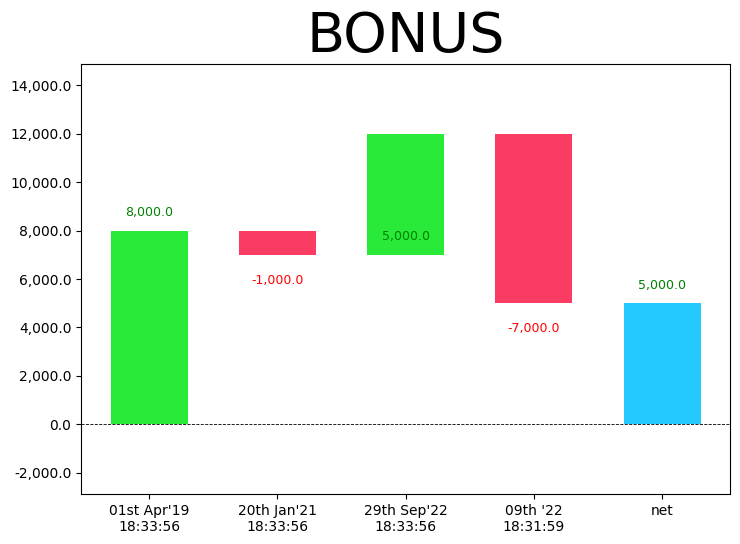

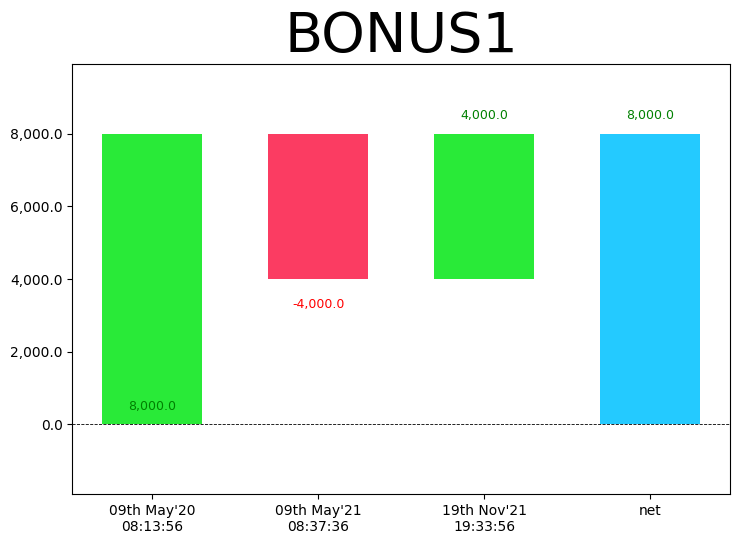

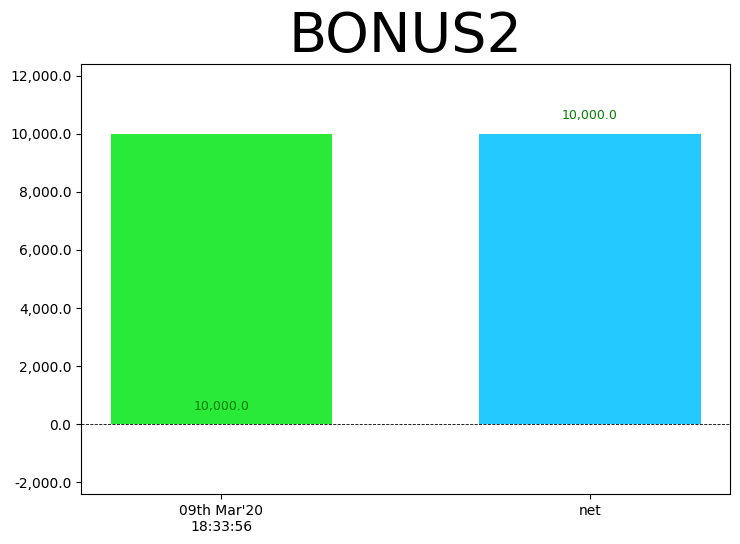

In [162]:


#def INSURANCE_POLICIES :
vec = []
amt = [[{}]]
data = {}
for x in f1["transactions"]["transaction"] :
    if x["type"] in vec :
        #push amount and time as a dict in the list index corresponding to position in vec
        data = {
            'amount': x["amount"],
            'time': x["txnDate"]
        }
        c = 0
        for y in vec :
            if y == x["type"] :
                break
            c = c+1
        amt[c].append(data)
    else :
        #push amount and time as a dict in the list and then append the list to amt
        data = {
            'amount': x["amount"],
            'time': x["txnDate"]
        }
        #print(data)
        c = len(vec)
        vec.append(x["type"])
        if c == 0 :
            amt[0] = [(data)]
        else :
            amt.append([(data)])
        #print(amt)
#print(vec)
#print(amt)

def year(time) :
    return time[0:4]
def month(time) :
    return time[5:7]
def date(time) :
    return time[8:10]
def hour(time) :
    return time[11:13]
def minute(time) :
    return time[14:16]
def second(time) :
    return time[17:19]
def swap(data, j) :
    temp = data[j]
    data[j] = data[j+1]
    data[j+1] = temp
    return data
for data in amt :
    for i in range(len(data)-1) :
        for j in range(len(data)-1) :
            if year(data[j]['time']) > year(data[j+1]['time']) :
                data = swap(data, j)
            elif year(data[j]['time']) == year(data[j+1]['time']) :
                if month(data[j]['time']) > month(data[j+1]['time']) :
                    data = swap(data, j)
                elif month(data[j]['time']) == month(data[j+1]['time']) :
                    if date(data[j]['time']) > date(data[j+1]['time']) :
                        data = swap(data, j)
                    elif date(data[j]['time']) == date(data[j+1]['time']) :
                        if hour(data[j]['time']) > hour(data[j+1]['time']) :
                            data = swap(data, j)
                        elif hour(data[j]['time']) == hour(data[j+1]['time']) :
                            if minute(data[j]['time']) > minute(data[j]['time']) :
                                data = swap(data, j)
                            elif minute(data[j]['time']) == minute(data[j+1]['time']) :
                                if second(data[j]['time']) > second(data[j+1]['time']) :
                                    data = swap(data, j)
#print(amt)


a = [[]]
b = [[]]
#print(amt)
for i in range(len(amt)) :
    last = 0
    for j in range(len(amt[i])) :
        key = amt[i][j]
        if i == 0 and j == 0 :
            a[0] = [key['time']]
        elif j == 0 and i != 0 :
            a.append([key['time']])
        else :
            a[i].append(key['time'])

        if i == 0 and j == 0 :
            b[0] = [int(key['amount'])]
        elif j == 0 and i != 0 :
                b.append([int(key['amount']) - last])
        else :
            b[i].append(int(key['amount']) - last)
        last = int(key['amount'])

    #a = [x for x in data[i][x]['time']]
    #b = [y for y in data[i][y]['amount']]
    #print(a[i])
    #print(b[i])

    #waterfall_chart.plot(a[i], b[i])

switcher_d = {
    '0': 'th',
    '1': 'st',
    '2': 'nd',
    '3': 'rd',
    '4': 'th',
    '5': 'th',
    '6': 'th',
    '7': 'th',
    '8': 'th',
    '9': 'th'
}
switcher_m = {
    '01': 'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'Jun',
    '07': 'Jul',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
}
for i in range(len(a)) :
    for j in range(len(a[i])) :
        str = ''
        val = a[i][j]
        #print(val)
        #date_val = date(val)
        str = date(val) + switcher_d.get(date(val)[1], '') + ' ' + switcher_m.get(month(val), '') + '\'' + year(val)[2:]
        str = str + '\n' + hour(val) + ':' + minute(val) + ':' + second(val)
        a[i][j] = str
        #print(str) 
#print(a)


for i in range(len(vec)) :
    waterfall_chart.plot(a[i], b[i], rotation_value=0)
    plt.title(vec[i], fontsize=40)